In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [2]:
df = pd.read_csv("cybersecurity_attacks.csv")

# First look at the data

In [3]:
print(df.dtypes)

Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object


In [4]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [5]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [6]:
df.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

40 thousands lines and some columns only have half of them fully completed. We need to see more elements, but those columns will probably be the first to go out.

C:\Users\hugoc\AppData\Local\Temp\ipykernel_10828\1192954723.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice_corr = df.corr()


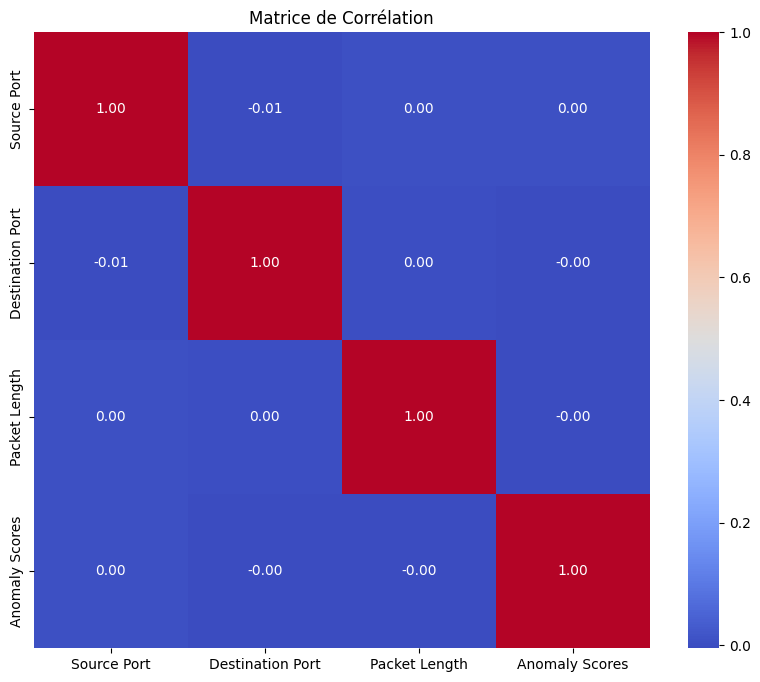

In [7]:
matrice_corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matrice de Corrélation')
plt.show()

# Adding the column "Tranches"

In [8]:
df['Tranches'] = pd.cut(df['Anomaly Scores'], bins=range(0, 110, 10), labels=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), include_lowest=True)

In [9]:
df["Tranches"]

0        2
1        5
2        8
3        1
4        0
        ..
39995    3
39996    2
39997    3
39998    9
39999    3
Name: Tranches, Length: 40000, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [10]:
df[["Tranches", "Anomaly Scores", "Attack Type"]]

,Tranches,Anomaly Scores,Attack Type
0,2,28.67,Malware
1,5,51.50,Malware
2,8,87.42,DDoS
3,1,15.79,Malware
4,0,0.52,DDoS
...,...,...,...
39995,3,39.28,DDoS
39996,2,27.25,DDoS
39997,3,31.01,DDoS
39998,9,97.85,Malware


In [11]:
df[["Severity Level", "Anomaly Scores", "Action Taken", "Attack Type"]]

,Severity Level,Anomaly Scores,Action Taken,Attack Type
0,Low,28.67,Logged,Malware
1,Low,51.50,Blocked,Malware
2,Low,87.42,Ignored,DDoS
3,Medium,15.79,Blocked,Malware
4,Low,0.52,Blocked,DDoS
...,...,...,...,...
39995,Medium,39.28,Logged,DDoS
39996,High,27.25,Logged,DDoS
39997,Low,31.01,Blocked,DDoS
39998,Low,97.85,Ignored,Malware


In [12]:
df.groupby(['Tranches', 'Attack Type']).size().reset_index(name = 'Count')

,Tranches,Attack Type,Count
0,0,DDoS,1327
1,0,Intrusion,1334
2,0,Malware,1341
3,1,DDoS,1348
4,1,Intrusion,1322
5,1,Malware,1318
6,2,DDoS,1316
7,2,Intrusion,1325
8,2,Malware,1303
9,3,DDoS,1330


In [13]:
df.groupby('User Information').size().reset_index(name = 'Count').sort_values(by="Count", ascending=False)

,User Information,Count
10002,Heer Lad,6
11637,Ishaan Chaudhari,6
16342,Mahika Sachdev,5
29084,Urvi Dara,5
18160,Nakul Krishna,5
...,...,...
12005,Ivan Mangal,1
12004,Ivan Mane,1
12002,Ivan Mallick,1
12001,Ivan Maharaj,1


In [14]:
df.groupby(['User Information', 'Destination IP Address']).size().reset_index(name = 'Count').sort_index

<bound method DataFrame.sort_index of       User Information Destination IP Address  Count
0      Aaina Ahluwalia            6.147.55.64      1
1           Aaina Arya          77.238.18.212      1
2           Aaina Arya          90.54.116.117      1
3           Aaina Babu          33.99.240.196      1
4           Aaina Bahl          79.170.68.254      1
...                ...                    ...    ...
39995        Zoya Vyas            61.85.71.20      1
39996       Zoya Wable         43.124.247.208      1
39997       Zoya Wason          58.175.184.47      1
39998        Zoya Yogi         98.224.109.204      1
39999    Zoya Yohannan          93.228.26.234      1

[40000 rows x 3 columns]>

# Encoding the data

In [50]:
y = df["Attack Type"]

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(df[["Protocol", "Packet Type", "Traffic Type",
                                "Malware Indicators", "Alerts/Warnings", "Attack Signature", "Action Taken",
                                "Severity Level", "Network Segment", 
                                "Firewall Logs", "IDS/IPS Alerts", "Log Source"]])
X_numeric = df[["Packet Length", "Anomaly Scores"]]
X_final = pd.concat([pd.DataFrame(X_encoded), X_numeric.reset_index(drop=True)], axis=1)



In [49]:
X_encoded = encoder.fit_transform(df[["Protocol", "Packet Type", "Traffic Type",
                                "Malware Indicators", "Alerts/Warnings", "Attack Signature", "Action Taken",
                                "Severity Level", "Network Segment", 
                                "Firewall Logs", "IDS/IPS Alerts", "Log Source"]])

In [51]:
X_final.columns = X_final.columns.astype(str)

In [90]:
def processing(data, list_column_name):
    df_processed = data
    for i in range(0, len(list_column_name)):
        df_processed = pd.concat([df_processed,pd.get_dummies(df_processed[list_column_name[i]])],axis=1).drop(columns=list_column_name[i])
    return df_processed


In [164]:
liste_nom = ["Protocol", "Packet Type", "Traffic Type",
                                "Malware Indicators", "Alerts/Warnings", "Attack Signature", "Action Taken",
                                "Severity Level", "Network Segment", 
                                "Firewall Logs", "IDS/IPS Alerts", "Log Source"]
df2 = processing(df, liste_nom)

#

## Deleting all columns with only unique information

In [165]:
df2 = df2.drop(["Timestamp", "Payload Data", "Source IP Address", "Destination IP Address", "Device Information", "Source Port",
                "Destination Port", "Geo-location Data", "Proxy Information", "User Information", "Tranches"], axis=1)


In [105]:
df2

,Packet Length,Anomaly Scores,ICMP,TCP,UDP,Control,Data,DNS,FTP,HTTP,...,High,Low,Medium,Segment A,Segment B,Segment C,Log Data,Alert Data,Firewall,Server
0,503,28.67,1,0,0,0,1,0,0,1,...,0,1,0,1,0,0,1,0,0,1
1,1174,51.50,1,0,0,0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0
2,306,87.42,0,0,1,1,0,0,0,1,...,0,1,0,0,0,1,1,1,1,0
3,385,15.79,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,1,0
4,1462,0.52,0,1,0,0,1,1,0,0,...,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1428,39.28,0,0,1,1,0,0,0,1,...,0,0,1,1,0,0,1,1,1,0
39996,1184,27.25,0,0,1,1,0,0,0,1,...,1,0,0,0,0,1,1,0,1,0
39997,1043,31.01,0,0,1,0,1,1,0,0,...,0,1,0,0,0,1,1,1,0,1
39998,483,97.85,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1


**Test**

In [183]:
df6 = df2.drop("UDP", axis = 1)

In [184]:
dico = {'Malware' : 0, 'DDoS' : 1, 'Intrusion' : 2}
df6['Attack Type'] = df6['Attack Type'].map(dico)

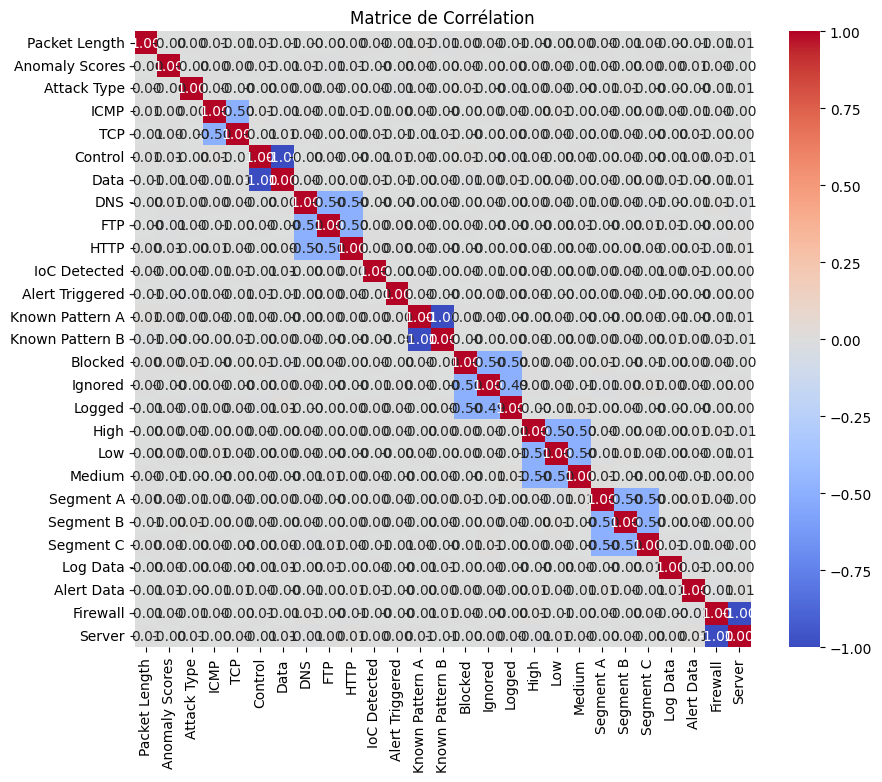

In [186]:
matrice_corr = df6.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matrice de Corrélation')
plt.show()

In [189]:
corr_var = matrice_corr['Attack Type'].sort_values(ascending=True)

In [190]:
corr_var

Alert Triggered   -0.011599
Logged            -0.008034
Segment A         -0.007561
Firewall          -0.005207
Known Pattern B   -0.004729
HTTP              -0.004095
Log Data          -0.003678
Alert Data        -0.003561
Segment C         -0.002529
Medium            -0.002461
Anomaly Scores    -0.002084
TCP               -0.001698
Control           -0.001641
Ignored           -0.000069
IoC Detected       0.000307
High               0.000588
ICMP               0.000851
DNS                0.001173
Data               0.001641
Low                0.001882
Packet Length      0.002824
FTP                0.002927
Known Pattern A    0.004729
Server             0.005207
Blocked            0.008053
Segment B          0.010087
Attack Type        1.000000
Name: Attack Type, dtype: float64

# Decision Tree

In [115]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(max_depth=50, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

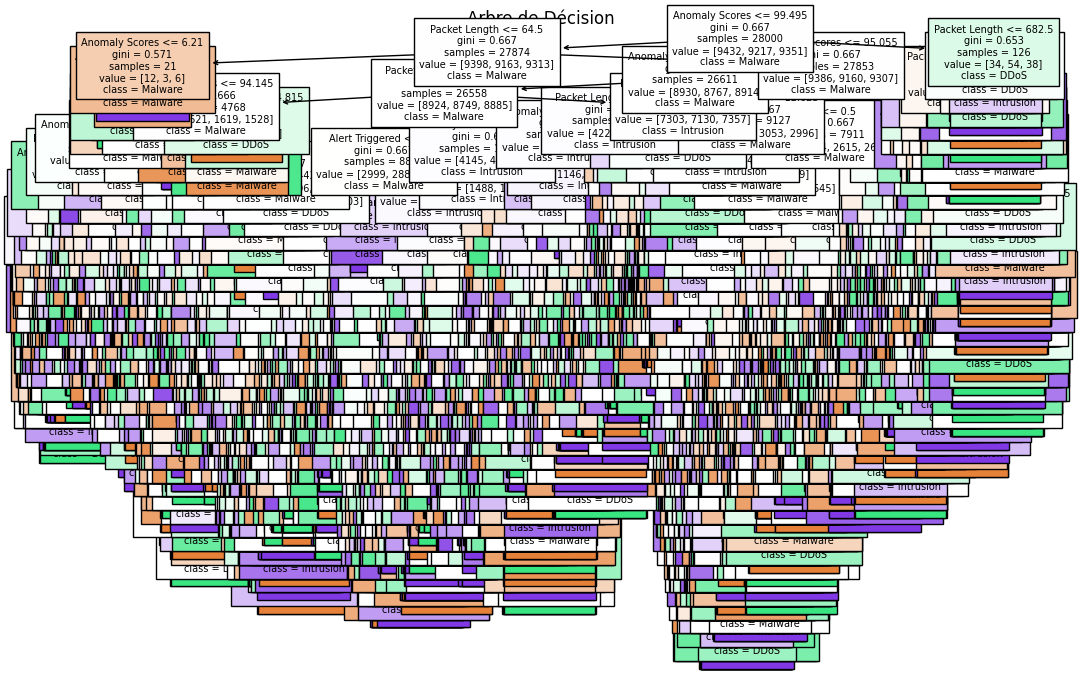

In [116]:
plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled=True, feature_names=df2.columns, class_names=y.unique(), fontsize=7)
plt.title("Arbre de Décision")
plt.show()

In [133]:
accuracy = model.score(X_test, y_test)
print(f'Précision du modèle : {accuracy * 100:.2f}%')

Précision du modèle : 33.30%


In [117]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [118]:
nn_model = MLPClassifier(hidden_layer_sizes=(20,10),max_iter=1000)
nn_model.fit(X=X_train,y=y_train)
y_test_predicted_nn = nn_model.predict(X_test)
report_nn = classification_report(y_pred=y_test_predicted_nn,y_true=y_test)

In [120]:
report_nn

'              precision    recall  f1-score   support\n\n        DDoS       0.34      0.08      0.14      3996\n   Intrusion       0.34      0.65      0.45      4048\n     Malware       0.34      0.28      0.30      3956\n\n    accuracy                           0.34     12000\n   macro avg       0.34      0.34      0.30     12000\nweighted avg       0.34      0.34      0.30     12000\n'

# Functions for processing the data

In [ ]:
def processing(data, list_column_name):
    df_processed = data
    for i in range(0, len(list_column_name)):
        df_processed = pd.concat([df_processed,pd.get_dummies(df_processed[list_column_name[i]])],axis=1).drop(columns=list_column_name[i])
    return df_processed


In [139]:
def conversion_NaN_ou_Exist(df, list_column_name):
  data = df
  for i in range(0, len(list_column_name)):
    data[list_column_name[i]] = data[list_column_name[i]].notna().astype(int)
  return data

In [140]:
df3 = df.drop(["Timestamp", "Payload Data", "Source IP Address", "Destination IP Address", "Device Information", "Source Port",
                "Destination Port", "Geo-location Data", "Proxy Information", "User Information", "Tranches", "Attack Type"], axis=1)

In [141]:
liste_na = ['Malware Indicators', 'Alerts/Warnings', 'Firewall Logs', 'IDS/IPS Alerts']
 
df4 = conversion_NaN_ou_Exist(df3, liste_na)

In [144]:
df4

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Signature,Action Taken,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
0,ICMP,503,Data,HTTP,1,28.67,0,Known Pattern B,Logged,Low,Segment A,1,0,Server
1,ICMP,1174,Data,HTTP,1,51.50,0,Known Pattern A,Blocked,Low,Segment B,1,0,Firewall
2,UDP,306,Control,HTTP,1,87.42,1,Known Pattern B,Ignored,Low,Segment C,1,1,Firewall
3,UDP,385,Data,HTTP,0,15.79,1,Known Pattern B,Blocked,Medium,Segment B,0,1,Firewall
4,TCP,1462,Data,DNS,0,0.52,1,Known Pattern B,Blocked,Low,Segment C,0,1,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,UDP,1428,Control,HTTP,1,39.28,0,Known Pattern A,Logged,Medium,Segment A,1,1,Firewall
39996,UDP,1184,Control,HTTP,1,27.25,0,Known Pattern A,Logged,High,Segment C,1,0,Firewall
39997,UDP,1043,Data,DNS,1,31.01,0,Known Pattern B,Blocked,Low,Segment C,1,1,Server
39998,UDP,483,Data,FTP,1,97.85,1,Known Pattern B,Ignored,Low,Segment B,1,0,Server


In [155]:
liste_nom = ["Protocol", "Packet Type", "Traffic Type",
                                "Attack Signature", "Action Taken",
                                "Severity Level", "Network Segment", 
                                "Log Source"]
df5 = processing(df4, liste_nom)

In [153]:
df5.head()

,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Firewall Logs,IDS/IPS Alerts,ICMP,TCP,UDP,Control,...,Ignored,Logged,High,Low,Medium,Segment A,Segment B,Segment C,Firewall,Server
0,503,1,28.67,0,1,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
1,1174,1,51.50,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,306,1,87.42,1,1,1,0,0,1,1,...,1,0,0,1,0,0,0,1,1,0
3,385,0,15.79,1,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
4,1462,0,0.52,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0


In [158]:
X_train, X_test, y_train, y_test = train_test_split(df5, y, test_size=0.3, random_state=42)

model2 = DecisionTreeClassifier(max_depth=10, random_state=42)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

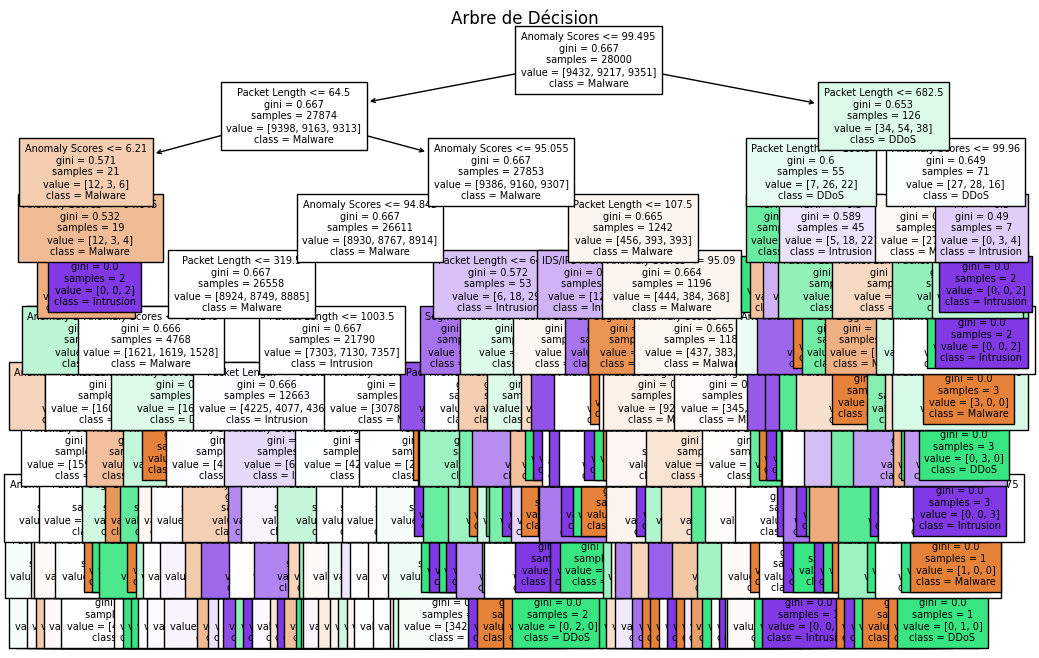

In [157]:
plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled=True, feature_names=df5.columns, class_names=y.unique(), fontsize=7)
plt.title("Arbre de Décision")
plt.show()

In [159]:
accuracy = model2.score(X_test, y_test)
print(f'Précision du modèle : {accuracy * 100:.2f}%')

Précision du modèle : 33.60%
